# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#NUM_POINTS = 25 # DEBUG 1500 

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    # else:
    #     print(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [4]:
# lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)

# lat_lngs = list(zip(lats, lngs))
# print(lat_lngs)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
      
        response = requests.get(city_url)  
        status_code = response.status_code
        if status_code == 200:
            city_weather = response.json()
            #print(city_weather)
        else:
            city_weather = {}
            #print(status_code, city_url)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        date = datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d')
      

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
    time.sleep(1)           
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | vallenar
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | yemetsk
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | suva
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | turpan
Processing Record 14 of Set 1 | kailua-kona
Processing Record 15 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | massenya
Processing Record 19 of Set 1 | tazacorte
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | albany
Processing R

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,17.14,57,75,4.12,US,1717477632
1,longyearbyen,78.2186,15.6401,3.91,81,75,10.80,SJ,1717477492
2,vallenar,-28.5708,-70.7581,17.31,62,100,0.67,CL,1717477632
3,grytviken,-54.2811,-36.5092,-0.54,87,45,4.29,GS,1717477632
4,ancud,-41.8697,-73.8203,8.65,86,100,5.12,CL,1717477633


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,17.14,57,75,4.12,US,1717477632
1,longyearbyen,78.2186,15.6401,3.91,81,75,10.80,SJ,1717477492
2,vallenar,-28.5708,-70.7581,17.31,62,100,0.67,CL,1717477632
3,grytviken,-54.2811,-36.5092,-0.54,87,45,4.29,GS,1717477632
4,ancud,-41.8697,-73.8203,8.65,86,100,5.12,CL,1717477633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

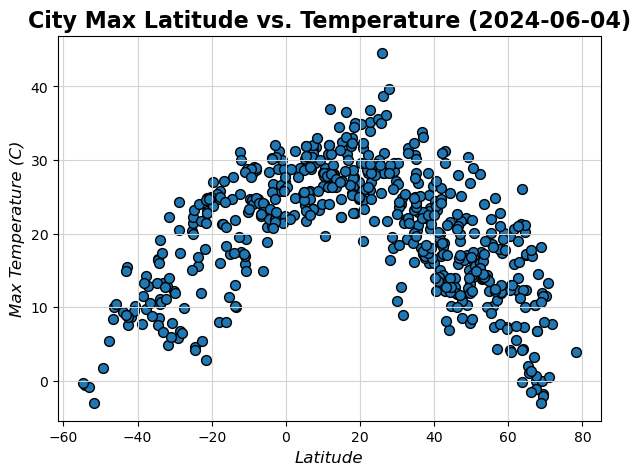

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(7,5))
plt.scatter(city_data_df.Lat,city_data_df["Max Temp"], edgecolor="black", s=50)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temperature (C)", fontsize=12, fontstyle="italic")
plt.title(f"City Max Latitude vs. Temperature ({date})", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=1)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

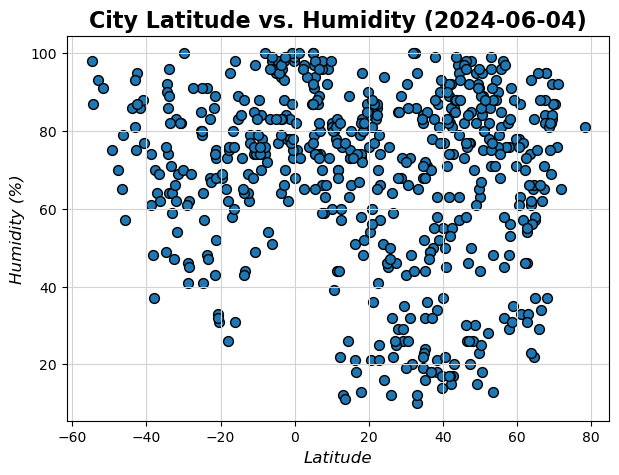

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df.Lat,city_data_df.Humidity, edgecolor="black", s=50)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")
plt.title(f"City Latitude vs. Humidity ({date})", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=1)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

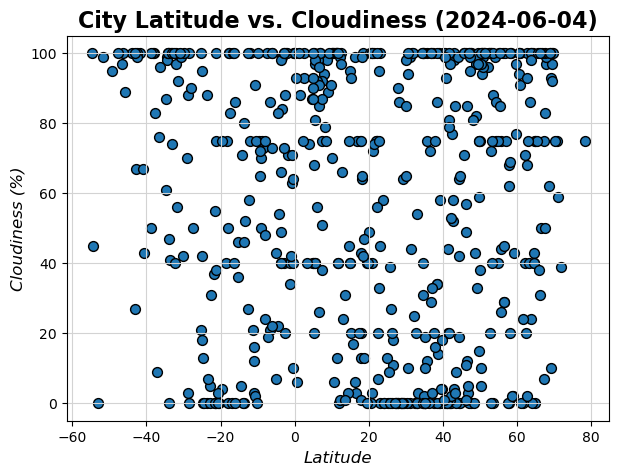

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df.Lat,city_data_df.Cloudiness, edgecolor="black", s=50)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")
plt.title(f"City Latitude vs. Cloudiness ({date})", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=1)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

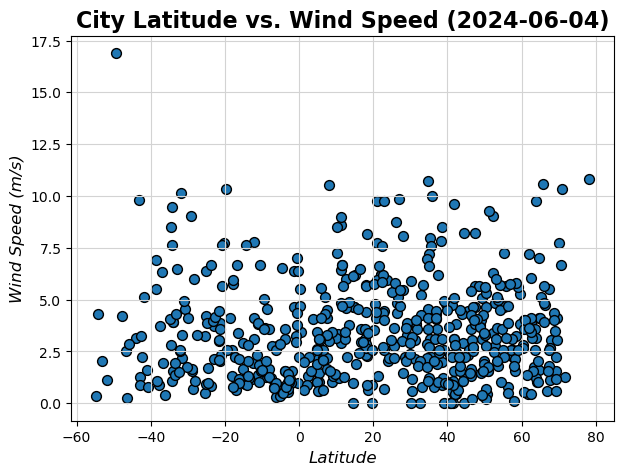

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df.Lat,city_data_df["Wind Speed"], edgecolor="black", s=50)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title(f"City Latitude vs. Wind Speed ({date})", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=1)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def reg_fun(x_val, y_val, y_label, a_pos):
    (slope, intercept,rvalue, pvalue, stderr)= linregress(x_val,y_val)
    regress_values=x_val * slope + intercept
    line_eq= f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    plt.scatter(x_val,y_val)
    plt.plot(x_val, regress_values, color='red')
    plt.annotate(line_eq, a_pos, fontsize=14, color='red')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(f"Latitude vs {y_label}")
    print(f"The r-squared-value is: {round(rvalue**2, 5)}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df.Lat >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,17.14,57,75,4.12,US,1717477632
1,longyearbyen,78.2186,15.6401,3.91,81,75,10.80,SJ,1717477492
5,yemetsk,63.4721,41.7941,21.26,74,86,1.74,RU,1717477633
10,whitehorse,60.7161,-135.0538,12.95,63,100,4.02,CA,1717477633
11,turpan,42.9333,89.1667,31.25,20,98,2.24,CN,1717477633


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df.Lat <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vallenar,-28.5708,-70.7581,17.31,62,100,0.67,CL,1717477632
3,grytviken,-54.2811,-36.5092,-0.54,87,45,4.29,GS,1717477632
4,ancud,-41.8697,-73.8203,8.65,86,100,5.12,CL,1717477633
6,punta arenas,-53.1500,-70.9167,-0.94,93,0,2.06,CL,1717477545
7,port-aux-francais,-49.3500,70.2167,1.72,75,95,16.89,TF,1717477633


###  Temperature vs. Latitude Linear Regression Plot

The r-squared-value is: 0.55452


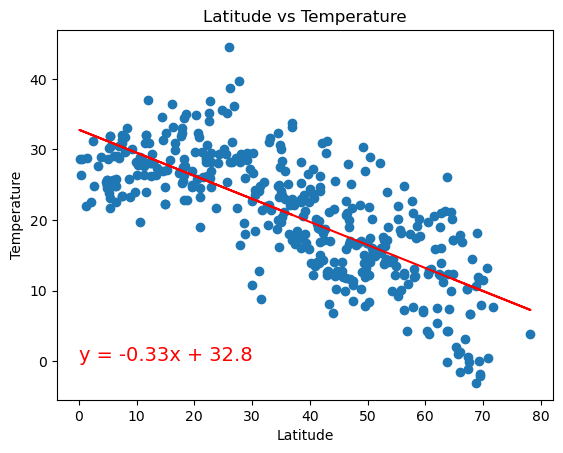

In [38]:
# Linear regression on Northern Hemisphere
x_val=northern_hemi_df.Lat
y_val=northern_hemi_df["Max Temp"]
reg_fun(x_val, y_val, "Temperature",(0,0))

The r-squared-value is: 0.58956


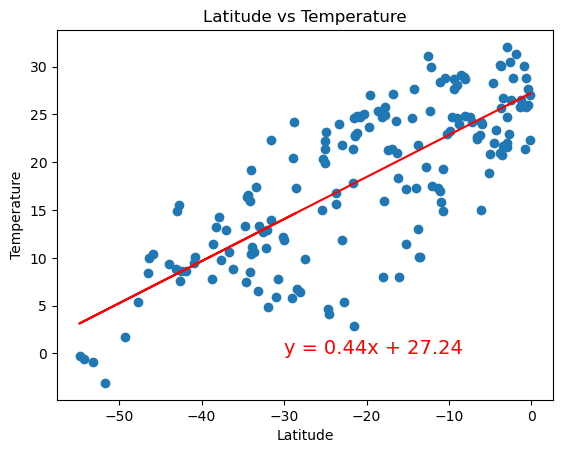

In [39]:
# Linear regression on Southern Hemisphere
x_val=southern_hemi_df.Lat
y_val=southern_hemi_df["Max Temp"]
reg_fun(x_val, y_val, "Temperature", (-30,0))

**Discussion about the linear relationship: 
With temperaure northen hemisphere and southern hemisphere have moderate negative and positive relationship respectively 

### Humidity vs. Latitude Linear Regression Plot

The r-squared-value is: 0.0015


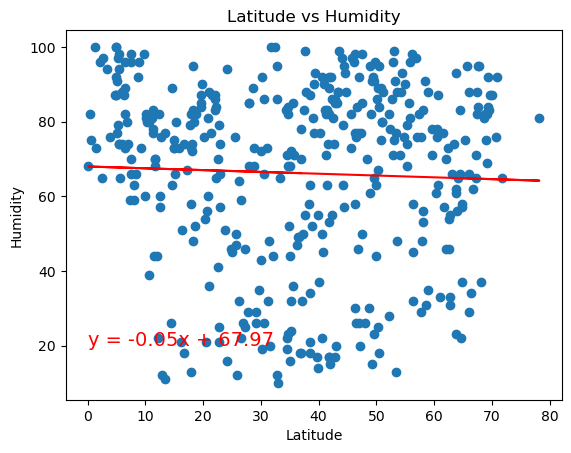

In [40]:
# Northern Hemisphere
x_val=northern_hemi_df.Lat
y_val=northern_hemi_df.Humidity
reg_fun(x_val, y_val, "Humidity",(0, 20))

The r-squared-value is: 0.02076


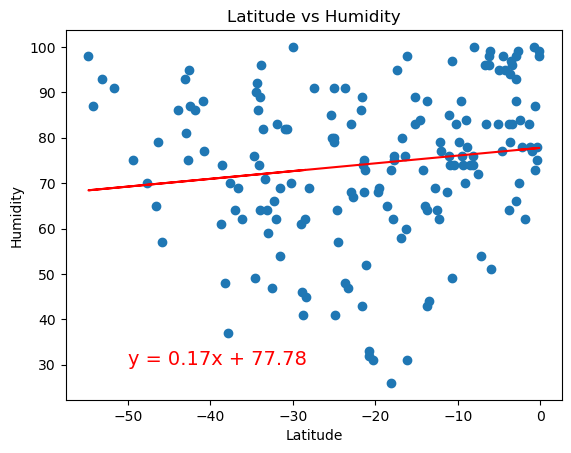

In [41]:
# Southern Hemisphere
x_val=southern_hemi_df.Lat
y_val=southern_hemi_df.Humidity
reg_fun(x_val, y_val, "Humidity", (-50,30))

**Discussion about the linear relationship:** 
With humidity northen hemisphere and southern hemisphere have very weak negative and positive relationship respectively 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared-value is: 0.00079


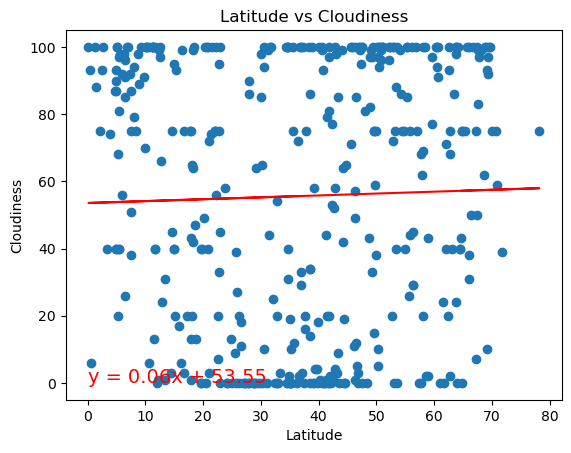

In [42]:
# Northern Hemisphere
x_val=northern_hemi_df.Lat
y_val=northern_hemi_df.Cloudiness
reg_fun(x_val, y_val, "Cloudiness",(0,0))

The r-squared-value is: 0.03076


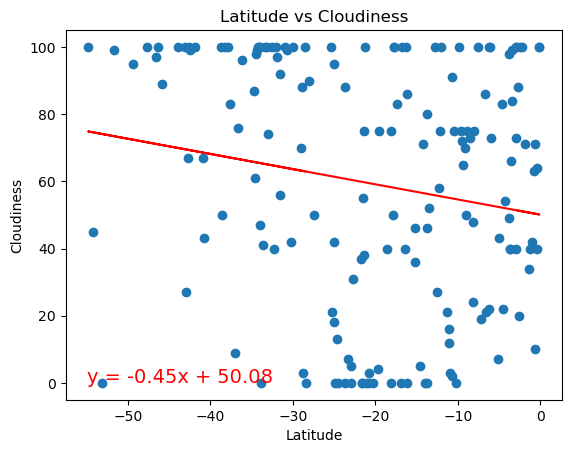

In [43]:
# Southern Hemisphere
x_val=southern_hemi_df.Lat
y_val=southern_hemi_df.Cloudiness
reg_fun(x_val, y_val, "Cloudiness",(-55,0))

**Discussion about the linear relationship:** cloudiness have very weak relationship with northen and southern hemishpere

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared-value is: 5e-05


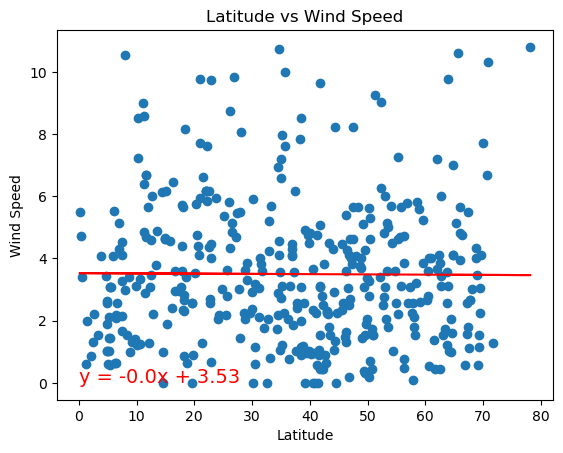

In [44]:
# Northern Hemisphere
x_val=northern_hemi_df.Lat
y_val=northern_hemi_df["Wind Speed"]
reg_fun(x_val, y_val, "Wind Speed",(0,0))

The r-squared-value is: 0.03909


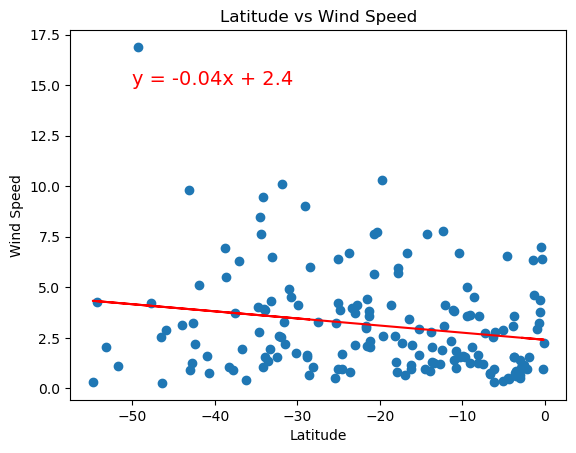

In [45]:
# Southern Hemisphere
x_val=southern_hemi_df.Lat
y_val=southern_hemi_df["Wind Speed"]
reg_fun(x_val, y_val, "Wind Speed",(-50, 15))

**Discussion about the linear relationship:** wind speed have very weak relation in northen and southern relationship